### Data Cleaning for Final Project

In [1]:
import pandas as pd
data = pd.read_csv("weather2021.csv")
import numpy as np

In [2]:
# force numeric numbers

data["year"] = data.datetime.str[:4].astype(int)
data["month"] = data.datetime.str[5:7].astype(int)
data["day"] = data.datetime.str[8:].astype(int)

data["sunrisetime"] = (data.sunrise.str[11:13].astype(int) + data.sunrise.str[14:16].astype(int)/60).round(2)
data["sunsettime"] = (data.sunset.str[11:13].astype(int) + data.sunset.str[14:16].astype(int)/60).round(2)
data["daytimehour"] = (data.sunsettime - data.sunrisetime).round(2)

In [3]:
# select a sample of visualizing one winter

sample = data[['datetime', 'year', 'month', 'day', 'temp', 'feelslike', 
             'humidity', 'windspeed', 'sunrisetime', 'sunsettime', 'daytimehour']]

winter_21_22 = sample.loc[((sample['month'] > 10) & (sample['year'] == 2021)) | 
               ((sample['month'] < 3) & (sample['year'] == 2022)) ]

winter_21_22.to_csv("winter21-22.csv")

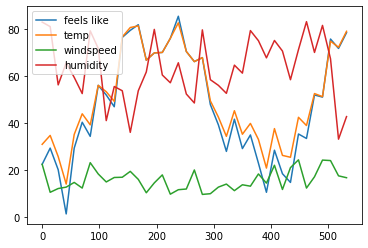

In [4]:
# check the visualization

import matplotlib.pyplot as plt

# select the first day of every two weeks?
small_sample = sample[0::14]

x = small_sample.datetime
plt.plot(small_sample.feelslike, label = "feels like")
plt.plot(small_sample.temp, label = "temp")
plt.plot(small_sample.windspeed, label = "windspeed")
plt.plot(small_sample.humidity, label = "humidity")

plt.legend()
plt.show()

In [5]:
data = pd.read_csv("chicago_weather.csv")

data["year"] = data.datetime.str[:4].astype(int)
data["month"] = data.datetime.str[5:7].astype(int)
data["day"] = data.datetime.str[8:].astype(int)

data["sunrisetime"] = (data.sunrise.str[11:13].astype(int) + data.sunrise.str[14:16].astype(int)/60).round(2)
data["sunsettime"] = (data.sunset.str[11:13].astype(int) + data.sunset.str[14:16].astype(int)/60).round(2)
data["daytimehour"] = (data.sunsettime - data.sunrisetime).round(2)

In [12]:
# create data for average sunlight and aggregated solar energy of (currently) one winter

# the data collecting has a limit of 1000 queries per day
# this later on will be the average data across the years

from statistics import mean

solar21 = data.groupby("month").aggregate(
    avg_sunrisetime = pd.NamedAgg(column="sunrisetime", aggfunc=mean),
    avg_sunsettime = pd.NamedAgg(column="sunsettime", aggfunc=mean),
    avg_daytime = pd.NamedAgg(column="daytimehour", aggfunc=mean),
    agg_solar_energy = pd.NamedAgg(column="solarenergy", aggfunc=sum)
)

solar21 = solar21.round(2)

solar21.to_csv("solar_21.csv")

In [13]:
solar21

,avg_sunrisetime,avg_sunsettime,avg_daytime,agg_solar_energy
month,,,,
1,7.22,16.77,9.55,264.1
2,6.76,17.38,10.62,431.4
3,6.59,18.56,11.97,557.1
4,6.15,19.53,13.38,547.8
5,5.50,20.07,14.57,590.2
6,5.26,20.43,15.17,653.2
7,5.50,20.36,14.86,290.3
8,5.99,19.79,13.80,246.9
9,6.52,18.97,12.45,168.5
